# HM 1.2

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
import datetime
from datetime import datetime, date

In [159]:
df = pd.read_csv('prices.csv',parse_dates=['Date'])

In [160]:
# 2.a

In [161]:
df.index = df['Date']

In [162]:
df.sort_values('AAPL', ascending = False).iloc[0]

Date    2018-10-03 00:00:00
AAPL                228.524
CVX                 120.427
IBM                 146.074
XOM                 82.3689
GS                  223.532
BA                   383.93
TEVA                  21.61
CME                 171.156
Name: 2018-10-03 00:00:00, dtype: object

In [163]:
# 2.b

In [164]:
date_col = df.pop('Date')

In [165]:
pc = df.copy()
pc.index = date_col

In [166]:
nt_returns = df / df.shift(1) - 1

In [167]:
gr_returns = (1 + nt_returns).cumprod()

In [168]:
daily_cr = gr_returns.copy()

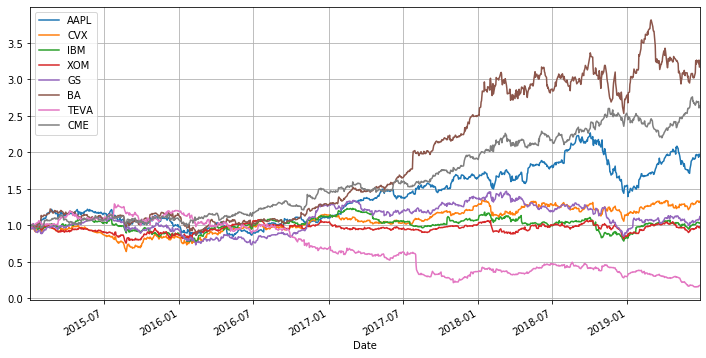

In [169]:
daily_cr.plot(figsize = (12, 6))
plt.grid()

In [204]:
df['AAPL'][:1]

Date
2015-01-02    100.755898
Name: AAPL, dtype: float64

In [202]:
rate = df['AAPL']/100.755898
rate[-1:]

Date
2019-06-28    1.956916
Name: AAPL, dtype: float64

In [208]:
inv = 100 * 1.956916
print(inv)

195.69160000000002


In [170]:
# 2.c

In [212]:
corrs = pc.corr().abs().unstack().sort_values(ascending = False).drop_duplicates()
corrs

CME  CME     1.000000
     BA      0.965883
BA   AAPL    0.931886
CME  AAPL    0.905804
CVX  TEVA    0.903758
               ...   
XOM  BA      0.280433
     GS      0.215939
IBM  AAPL    0.206996
     CME     0.124054
     BA      0.115442
Length: 29, dtype: float64

In [172]:
from pandas.plotting import scatter_matrix

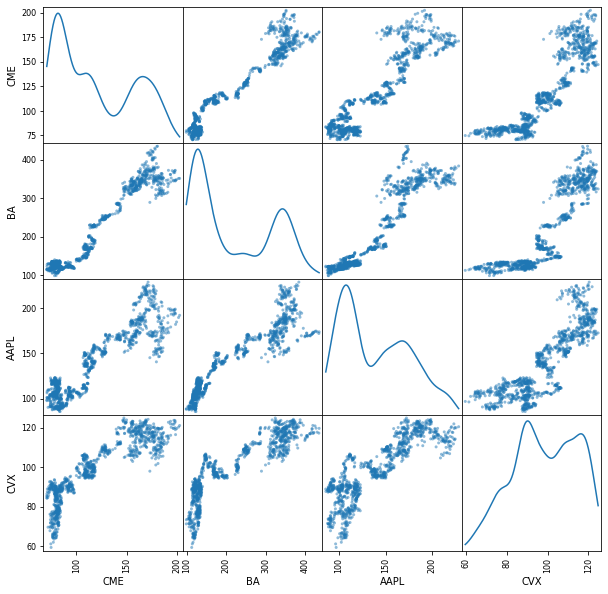

In [173]:
scatter_matrix(pc[['CME','BA','AAPL','CVX']], diagonal = 'kde', figsize = (10,10));

In [174]:
# 2.d

In [175]:
from scipy import stats

In [176]:
ibm = df['IBM']
ibm_rt = ibm / ibm.shift(1) - 1

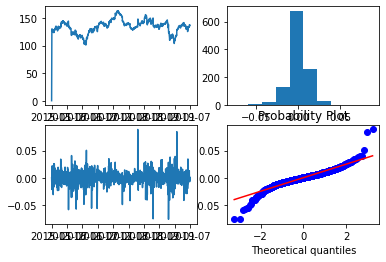

In [192]:
plt.subplot(2, 2, 1)
plt.plot(ibm);

plt.subplot(2, 2, 2)
plt.hist(ibm_rt);

plt.subplot(2, 2, 4)
stats.probplot(ibm_rt, plot = plt);

ibm_rt[0] = 0
plt.subplot(2, 2, 3)
plt.plot(ibm_rt);